# Notebook for Testing and Running a Fast Example

In [3]:
%matplotlib inline
import os
import numpy as np

## Generation Test

Run the following cells. If the code runs successfully, initial_test.hdf5 file will be added to the current directory. It will be an SNR gridded dataset with total mass as the x-value and redshift as the y value. It will use the Classic LISA and Proposed LISA curves for the SNR calculation and the Hils-Bender estimation (Bender & Hils 1997) by Hiscock et al. 2000 for the white dwarf noise (provided in GitHub). This will verify that the generation code (``generate_contour_data.py``) and, especially, ``pyphenomd.py`` runs correctly. 

Please refer to and cite "Evaluating Black Hole Detectability with LISA" (arXiv:1807.02511) for usage of this tool and an example of its application. The codes here are shared under the GNU license. Refere to https://mikekatz04.github.io/BOWIE/ for documentation.

In [2]:
from gwsnrcalc.generate_contour_data import generate_contour_data
from gwsnrcalc.genconutils.forminput import MainContainer as GenInput

/Users/michaelkatz/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
test_generation = GenInput(print_input=True)

# main inputs
test_generation.set_signal_type(["all", "ins", "mrg", "rd"])
test_generation.set_generation_type(num_processors=-1, num_splits=500, verbose=2)
test_generation.set_wd_noise(True)

# output_info
test_generation.set_working_directory('.')
test_generation.set_output_file('initial_test.hdf5')
test_generation.set_x_col_name('M_s')
test_generation.set_y_col_name('z')

# add a note about white dwarf noise
test_generation.add_note("Hils-Bender white dwarf noise.")

# input sensitivity info
test_generation.add_noise_curve('PL', noise_type='ASD')
test_generation.add_noise_curve('CL', noise_type='ASD')

# generation info
test_generation.set_x_grid_info(1e2, 1e10, 50, 'log', 'total_mass')
test_generation.set_y_grid_info(1e-2, 1e2, 50, 'log', 'redshift')

test_generation.add_fixed_parameter(0.2, 'mass_ratio')
test_generation.add_fixed_parameter(0.8, 'spin_1')
test_generation.add_fixed_parameter(0.8, 'spin_2')
test_generation.add_fixed_parameter(1.0, 'start_time')
test_generation.add_fixed_parameter(0.0, 'end_time')

# add LISA averaging factor
test_generation.set_snr_prefactor(np.sqrt(2.*16./5.))


generate_contour_data(test_generation)

{'generate_info': {'y_low': 0.01, 'xscale': 'log', 'y_high': 100.0, 'xval_name': 'total_mass', 'mass_ratio': 0.2, 'num_x': 50, 'end_time': 0.0, 'num_y': 50, 'start_time': 1.0, 'yval_name': 'redshift', 'x_low': 100.0, 'spin_1': 0.8, 'x_high': 10000000000.0, 'yscale': 'log', 'spin_2': 0.8}, 'snr_input': {'prefactor': 2.5298221281347035, 'signal_type': ['all', 'ins', 'mrg', 'rd']}, 'sensitivity_input': {'add_wd_noise': 'True', 'noise_type_in': ['ASD', 'ASD'], 'sensitivity_curves': ['PL', 'CL']}, 'parallel_input': {'verbose': 2, 'num_splits': 500, 'num_processors': -1}, 'general': {'WORKING_DIRECTORY': '.'}, 'output_info': {'output_file_name': 'initial_test.hdf5', 'x_col_name': 'M_s', 'y_col_name': 'z', 'added_note': 'Hils-Bender white dwarf noise.'}}
start pool with 4 processors: 5 total processes.

Process  4 is finished.
Process  2 is finished.
outputing file: ./initial_test.hdf5
5.001166820526123


## Make Plot Test

Run the following cells to test each plot from make plot. It will produce a Waterfall, Ratio, and Horizon plot. 

In [1]:
from bowie_makeplot.make_plot import plot_main
from bowie_makeplot.plotutils.forminput import MainContainer as PlotInput

/Users/michaelkatz/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


{'plot_info': {'0': {'limits': {}, 'extra': {}, 'legend': {}, 'file': [{'label': 'PL_wd_all'}], 'label': {}, 'plot_type': 'Waterfall'}, '1': {'control': {'label': 'CL_wd_all'}, 'limits': {}, 'extra': {}, 'legend': {'add_legend': True, 'legend_labels': None, 'legend_kwargs': {'prop': {'size': 15}}}, 'file': [{'label': 'PL_wd_all'}], 'label': {}, 'plot_type': 'Ratio'}, '2': {'limits': {}, 'extra': {}, 'legend': {'add_legend': True, 'legend_labels': ['PL', 'CL'], 'legend_kwargs': {'prop': {'size': 15}}}, 'file': [{'label': 'PL_wd_all'}, {'label': 'CL_wd_all'}], 'label': {}, 'plot_type': 'Horizon'}}, 'general': {'xscale': 'log', 'num_cols': 1, 'num_rows': 3, 'yscale': 'lin', 'x_tick_label_fontsize': 16, 'sharey': True, 'sharex': True, 'ylims': [0.0, 20.0], 'y_column_label': 'z', 'dy': 4.0, 'x_column_label': 'M_s', 'xlims': [2.0, 10.0], 'y_tick_label_fontsize': 16, 'dx': 1.0, 'WORKING_DIRECTORY': '.', 'file_name': 'initial_test.hdf5'}, 'figure': {'fig_x_label_kwargs': {'va': 'center', 'font

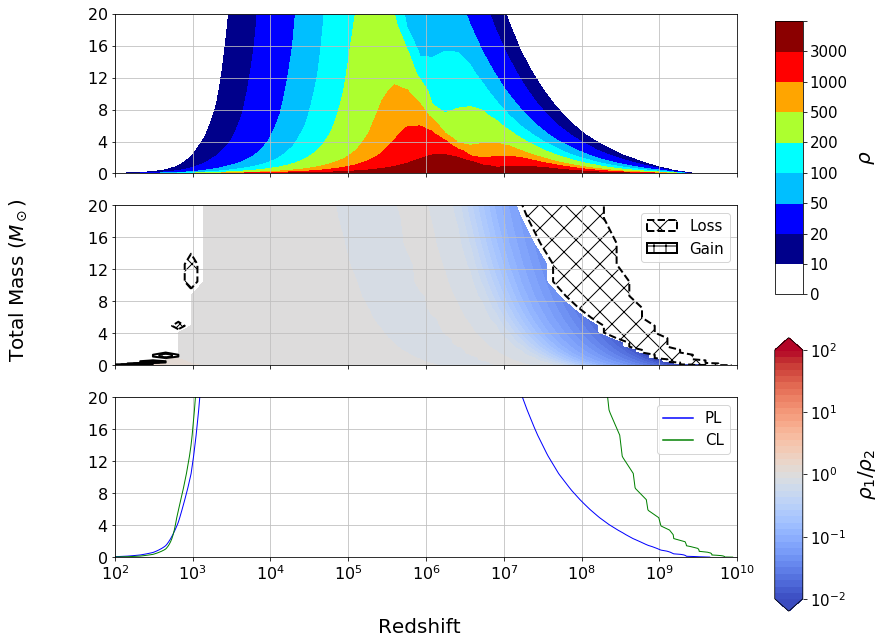

In [4]:
test_plot = PlotInput(3, 1, print_input=True)

# set general info
test_plot.set_working_directory(".")
test_plot.set_all_file_column_labels(xlabel='M_s', ylabel='z')
test_plot.set_fig_size(13.0, 10.0)
test_plot.set_all_xlims([2.0, 10.0], 1.0, 'log', fontsize=16)
test_plot.set_all_ylims([0.0, 20.0], 4.0, 'lin', fontsize=16)
test_plot.set_fig_x_label(r"Total Mass ($M_\odot$)")
test_plot.set_fig_y_label("Redshift")
test_plot.set_all_file_name("initial_test.hdf5")

# set plot_info

for i, plot_type in enumerate(['Waterfall', 'Ratio', 'Horizon']):
    test_plot.ax[i].set_plot_type(plot_type)
    
for i in np.arange(3):
    test_plot.ax[i].add_dataset(label="PL_wd_all")
    
test_plot.ax[1].add_dataset(label="CL_wd_all", control=True)
test_plot.ax[1].add_legend(size=15)

test_plot.ax[2].add_dataset(label="CL_wd_all")
test_plot.ax[2].add_legend(labels=['PL', 'CL'], size=15)

plot_main(test_plot)